# Hospital Emergency Room (ER) Analysis

This notebook analyzes hospital ER data to identify trends in patient wait times, satisfaction scores, and admission statistics.


In [36]:
import pandas as pd

# Define file path
file_path = "Hospital ER_Data 2.csv"

# Load the dataset
df = pd.read_csv(file_path)

# Display basic information and first few rows
df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9216 entries, 0 to 9215
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Patient Id                  9216 non-null   object 
 1   Patient Admission Date      9216 non-null   object 
 2   Patient First Inital        9216 non-null   object 
 3   Patient Last Name           9216 non-null   object 
 4   Patient Gender              9216 non-null   object 
 5   Patient Age                 9216 non-null   int64  
 6   Patient Race                9216 non-null   object 
 7   Department Referral         3816 non-null   object 
 8   Patient Admission Flag      9216 non-null   bool   
 9   Patient Satisfaction Score  2517 non-null   float64
 10  Patient Waittime            9216 non-null   int64  
 11  Patients CM                 9216 non-null   int64  
dtypes: bool(1), float64(1), int64(3), object(7)
memory usage: 801.1+ KB


(None,
     Patient Id Patient Admission Date Patient First Inital Patient Last Name  \
 0  145-39-5406       20-03-2024 08:47                    H         Glasspool   
 1  316-34-3057       15-06-2024 11:29                    X           Methuen   
 2  897-46-3852       20-06-2024 09:13                    P         Schubuser   
 3  358-31-9711       04-02-2024 22:34                    U          Titcombe   
 4  289-26-0537       04-09-2024 17:48                    Y       Gionettitti   
 
   Patient Gender  Patient Age                   Patient Race  \
 0              M           69                          White   
 1              M            4  Native American/Alaska Native   
 2              F           56               African American   
 3              F           24  Native American/Alaska Native   
 4              M            5               African American   
 
   Department Referral  Patient Admission Flag  Patient Satisfaction Score  \
 0                 NaN             

## 1. Data Loading

Load the dataset and display basic information about its structure.


In [37]:
# Drop unnecessary columns (identifiable patient data)
df_cleaned = df.drop(columns=["Patient Id", "Patient First Inital", "Patient Last Name"])

# Convert 'Patient Admission Date' to datetime format
df_cleaned["Patient Admission Date"] = pd.to_datetime(df_cleaned["Patient Admission Date"], format="%d-%m-%Y %H:%M")

# Fill missing satisfaction scores with the median (as it's an ordinal metric)
df_cleaned["Patient Satisfaction Score"].fillna(df_cleaned["Patient Satisfaction Score"].median(), inplace=True)

# Display cleaned dataset info
df_cleaned.info(), df_cleaned.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9216 entries, 0 to 9215
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Patient Admission Date      9216 non-null   datetime64[ns]
 1   Patient Gender              9216 non-null   object        
 2   Patient Age                 9216 non-null   int64         
 3   Patient Race                9216 non-null   object        
 4   Department Referral         3816 non-null   object        
 5   Patient Admission Flag      9216 non-null   bool          
 6   Patient Satisfaction Score  9216 non-null   float64       
 7   Patient Waittime            9216 non-null   int64         
 8   Patients CM                 9216 non-null   int64         
dtypes: bool(1), datetime64[ns](1), float64(1), int64(3), object(3)
memory usage: 585.1+ KB


/var/folders/g4/y6v5qzbj28lb3__3vvn6prx40000gn/T/ipykernel_26454/1741902532.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned["Patient Satisfaction Score"].fillna(df_cleaned["Patient Satisfaction Score"].median(), inplace=True)


(None,
   Patient Admission Date Patient Gender  Patient Age  \
 0    2024-03-20 08:47:00              M           69   
 1    2024-06-15 11:29:00              M            4   
 2    2024-06-20 09:13:00              F           56   
 3    2024-02-04 22:34:00              F           24   
 4    2024-09-04 17:48:00              M            5   
 
                     Patient Race Department Referral  Patient Admission Flag  \
 0                          White                 NaN                   False   
 1  Native American/Alaska Native                 NaN                    True   
 2               African American    General Practice                    True   
 3  Native American/Alaska Native    General Practice                    True   
 4               African American         Orthopedics                   False   
 
    Patient Satisfaction Score  Patient Waittime  Patients CM  
 0                        10.0                39            0  
 1                         5.0   

## 2. Data Cleaning

Remove unnecessary columns and convert date columns to the appropriate format.


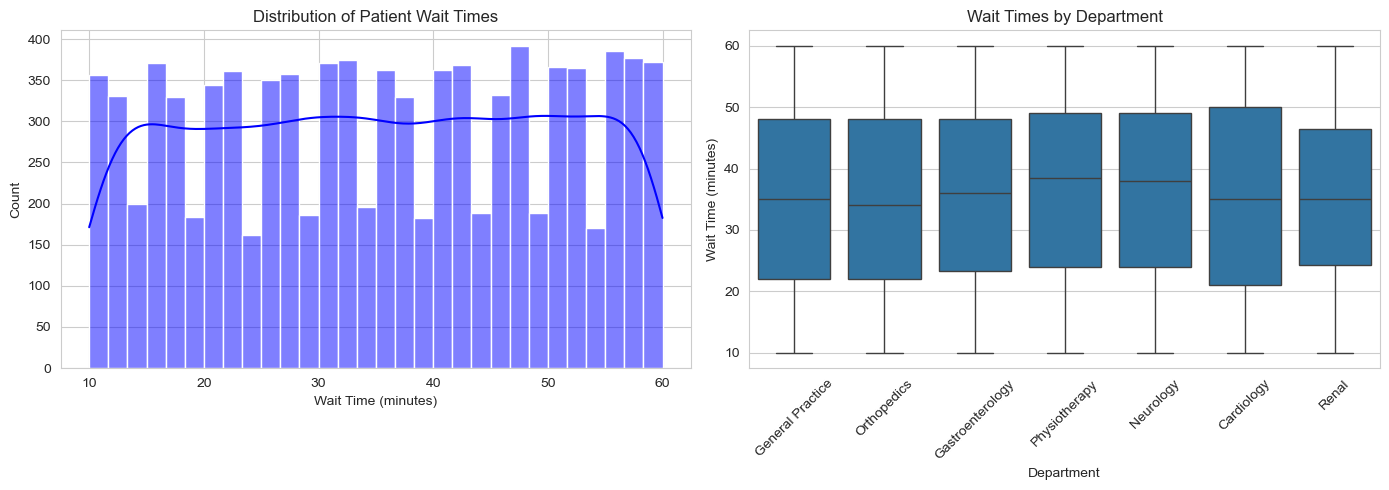

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style("whitegrid")

# Create figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Distribution of patient wait times
sns.histplot(df_cleaned["Patient Waittime"], bins=30, kde=True, ax=axes[0], color="blue")
axes[0].set_title("Distribution of Patient Wait Times")
axes[0].set_xlabel("Wait Time (minutes)")
axes[0].set_ylabel("Count")

# Boxplot of wait times by department
sns.boxplot(x="Department Referral", y="Patient Waittime", data=df_cleaned, ax=axes[1])
axes[1].set_title("Wait Times by Department")
axes[1].set_xlabel("Department")
axes[1].set_ylabel("Wait Time (minutes)")
axes[1].tick_params(axis="x", rotation=45)

# Show plots
plt.tight_layout()
plt.show()


## 3. Data Exploration

Visualizing key features such as wait times, satisfaction scores, and patient demographics.


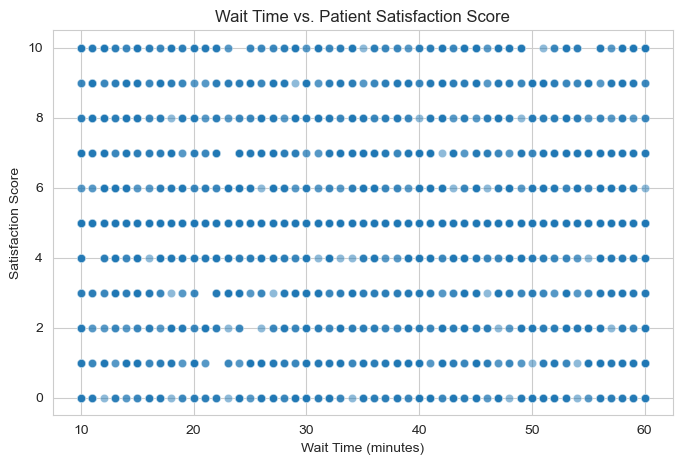

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.scatterplot(x=df_cleaned["Patient Waittime"], y=df_cleaned["Patient Satisfaction Score"], alpha=0.5)
plt.title("Wait Time vs. Patient Satisfaction Score")
plt.xlabel("Wait Time (minutes)")
plt.ylabel("Satisfaction Score")
plt.show()


## 4. Correlation Analysis

Explore relationships between wait times and satisfaction scores.


In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation between Wait Time and Satisfaction Score
correlation = df_cleaned["Patient Waittime"].corr(df_cleaned["Patient Satisfaction Score"])
print(f"Correlation between Wait Time and Satisfaction Score: {correlation}")



Correlation between Wait Time and Satisfaction Score: -0.011164623359065297


## 5. Departmental Satisfaction Analysis

Analyze patient satisfaction scores by hospital departments.


/var/folders/g4/y6v5qzbj28lb3__3vvn6prx40000gn/T/ipykernel_26454/2629007294.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_satisfaction_by_dept.index, y=avg_satisfaction_by_dept.values, palette="coolwarm")


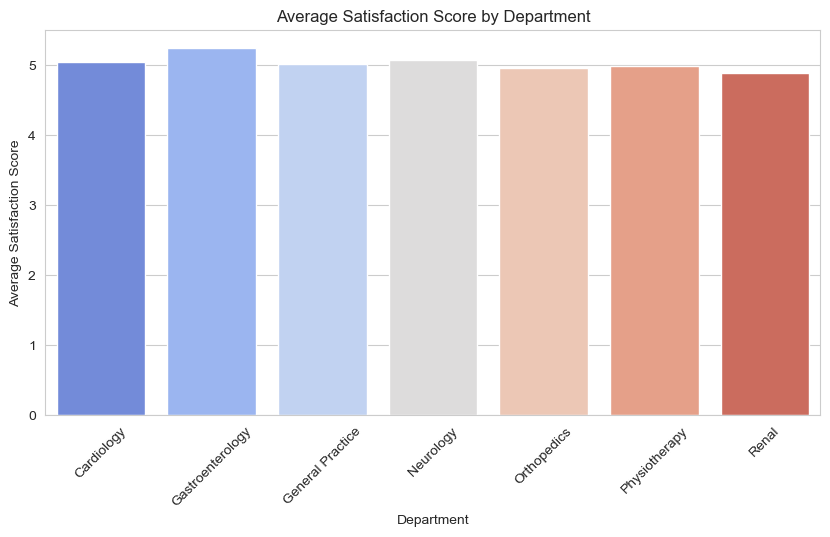

In [41]:
# Bar Plot: Average Satisfaction Score by Department
plt.figure(figsize=(10, 5))
sns.barplot(x=avg_satisfaction_by_dept.index, y=avg_satisfaction_by_dept.values, palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Average Satisfaction Score by Department")
plt.xlabel("Department")
plt.ylabel("Average Satisfaction Score")
plt.show()

## 6. Admissions Analysis

Examine admissions trends based on gender, race, and age groups.


In [42]:
# Admissions by Gender and Race
admissions_by_gender = df_cleaned.groupby("Patient Gender")["Patient Admission Flag"].sum()
admissions_by_race = df_cleaned.groupby("Patient Race")["Patient Admission Flag"].sum()

print("\nAdmissions by Gender:")
print(admissions_by_gender)
print("\nAdmissions by Race:")
print(admissions_by_race)


Admissions by Gender:
Patient Gender
F     2250
M     2355
NC       7
Name: Patient Admission Flag, dtype: int64

Admissions by Race:
Patient Race
African American                  995
Asian                             541
Declined to Identify              508
Native American/Alaska Native     251
Pacific Islander                  265
Two or More Races                 763
White                            1289
Name: Patient Admission Flag, dtype: int64


## 7. Age Group Analysis

Categorize patients into age groups and analyze related trends.


/var/folders/g4/y6v5qzbj28lb3__3vvn6prx40000gn/T/ipykernel_26454/758752477.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=admissions_by_gender.index, y=admissions_by_gender.values, palette="viridis")


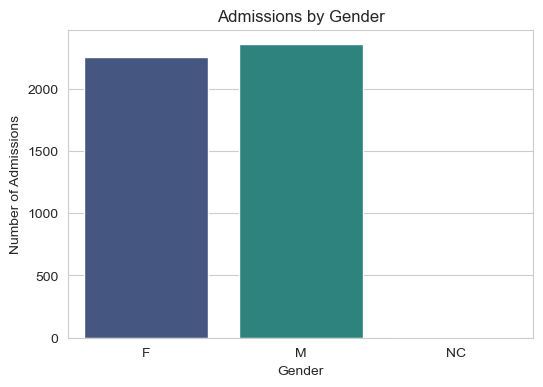

In [43]:
# Bar Plot: Admissions by Gender
plt.figure(figsize=(6, 4))
sns.barplot(x=admissions_by_gender.index, y=admissions_by_gender.values, palette="viridis")
plt.title("Admissions by Gender")
plt.xlabel("Gender")
plt.ylabel("Number of Admissions")
plt.show()

/var/folders/g4/y6v5qzbj28lb3__3vvn6prx40000gn/T/ipykernel_26454/1072634454.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=admissions_by_race.index, y=admissions_by_race.values, palette="magma")


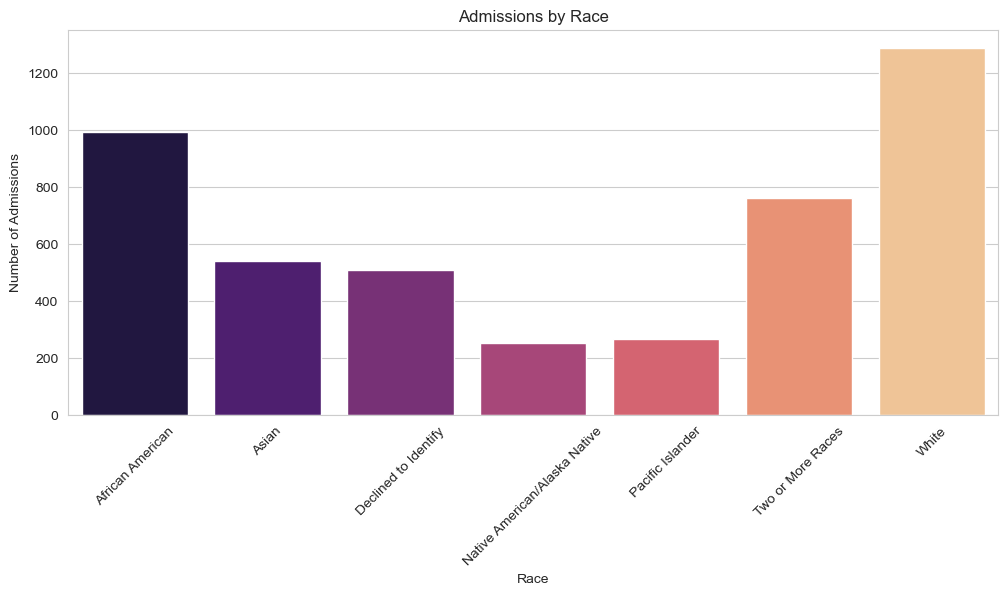

In [44]:
# Bar Plot: Admissions by Race
plt.figure(figsize=(12, 5))
sns.barplot(x=admissions_by_race.index, y=admissions_by_race.values, palette="magma")
plt.xticks(rotation=45)
plt.title("Admissions by Race")
plt.xlabel("Race")
plt.ylabel("Number of Admissions")
plt.show()

In [45]:
# Age Group Analysis
df_cleaned["Age Group"] = pd.cut(df_cleaned["Patient Age"], bins=[0, 18, 35, 50, 65, 100], 
                                 labels=["0-18", "19-35", "36-50", "51-65", "66+"])
avg_wait_by_age = df_cleaned.groupby("Age Group")["Patient Waittime"].mean()
print("\nAverage Wait Time by Age Group:")
print(avg_wait_by_age)


Average Wait Time by Age Group:
Age Group
0-18     35.318483
19-35    35.499748
36-50    35.351914
51-65    34.864583
66+      35.210266
Name: Patient Waittime, dtype: float64


/var/folders/g4/y6v5qzbj28lb3__3vvn6prx40000gn/T/ipykernel_26454/2453513424.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_wait_by_age = df_cleaned.groupby("Age Group")["Patient Waittime"].mean()


/var/folders/g4/y6v5qzbj28lb3__3vvn6prx40000gn/T/ipykernel_26454/2890973439.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_wait_by_age.index, y=avg_wait_by_age.values, palette="coolwarm")


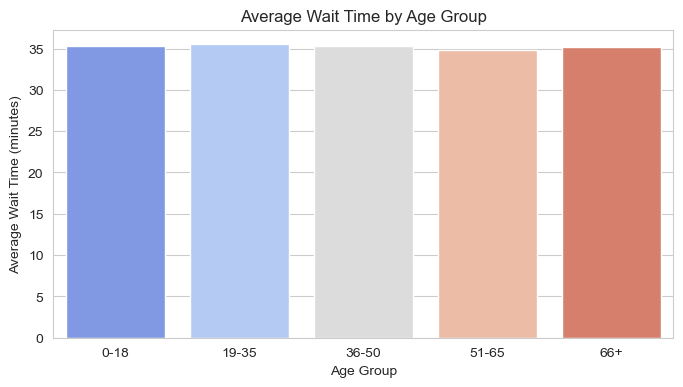

In [46]:

# Bar Plot: Average Wait Time by Age Group
plt.figure(figsize=(8, 4))
sns.barplot(x=avg_wait_by_age.index, y=avg_wait_by_age.values, palette="coolwarm")
plt.title("Average Wait Time by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Average Wait Time (minutes)")
plt.show()


/var/folders/g4/y6v5qzbj28lb3__3vvn6prx40000gn/T/ipykernel_26454/3206369582.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_satisfaction_by_wait = df_cleaned.groupby("Wait Time Bin")["Patient Satisfaction Score"].mean()


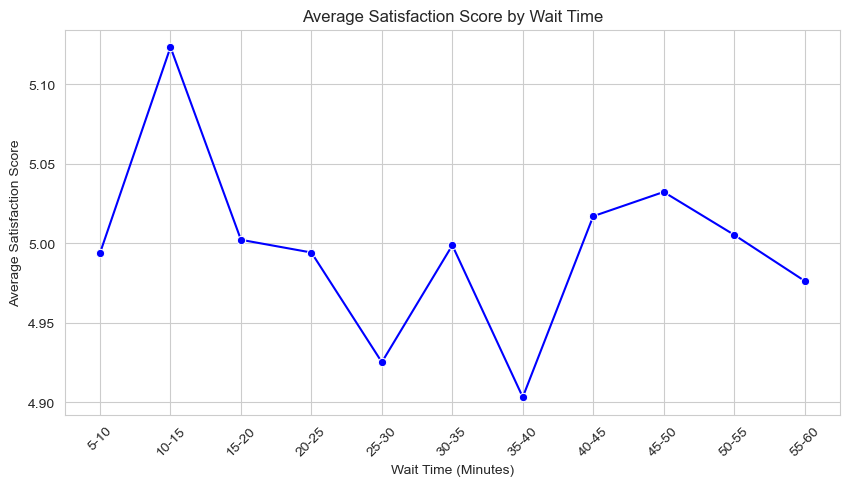

In [61]:
import numpy as np

# Group wait times into bins (e.g., 10-minute intervals)
df_cleaned["Wait Time Bin"] = pd.cut(df_cleaned["Patient Waittime"], bins=np.arange(0, df_cleaned["Patient Waittime"].max()+5, 5))

# Calculate average satisfaction score for each bin
avg_satisfaction_by_wait = df_cleaned.groupby("Wait Time Bin")["Patient Satisfaction Score"].mean()

# Convert bins to string labels for better readability
wait_bin_labels = [f"{int(interval.left)}-{int(interval.right)}" for interval in avg_satisfaction_by_wait.index]

# Plot the line chart
plt.figure(figsize=(10, 5))
sns.lineplot(x=wait_bin_labels, y=avg_satisfaction_by_wait.values, marker="o", linestyle="-", color="blue")
plt.xticks(rotation=45)
plt.title("Average Satisfaction Score by Wait Time")
plt.xlabel("Wait Time (Minutes)")
plt.ylabel("Average Satisfaction Score")
plt.grid(True)
plt.show()


---

## 📊 8. Hypothesis Testing (Statistical Analysis)  

### 🔎 a) Does Wait Time Significantly Affect Satisfaction? (T-test)  
- Perform a **T-test** to determine if patient wait time has a statistically significant effect on satisfaction scores.  
- Null Hypothesis (**H₀**): Wait time has no significant effect on patient satisfaction.  
- Alternative Hypothesis (**H₁**): Longer wait times lead to lower satisfaction.  

/var/folders/g4/y6v5qzbj28lb3__3vvn6prx40000gn/T/ipykernel_26454/3562050995.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Wait Time Group", y="Patient Satisfaction Score", data=df_cleaned, palette="coolwarm")


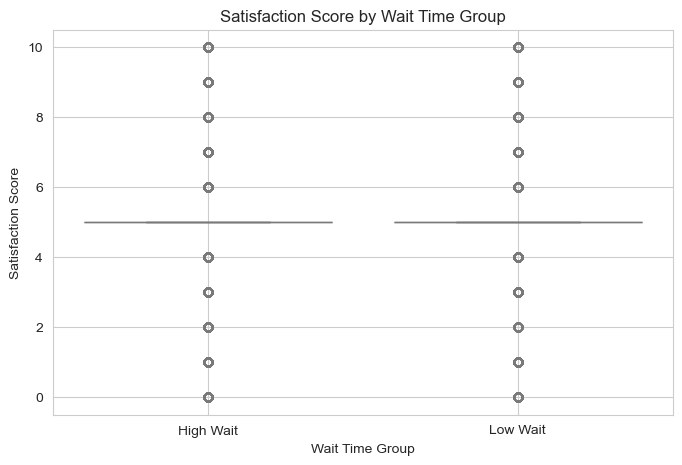

T-test Results: t-statistic = 0.9120, p-value = 0.3618
No significant difference in satisfaction scores based on wait time.


In [76]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# Define groups
median_wait = df_cleaned["Patient Waittime"].median()
df_cleaned["Wait Time Group"] = ["Low Wait" if x < median_wait else "High Wait" for x in df_cleaned["Patient Waittime"]]

# Boxplot for visualization
plt.figure(figsize=(8, 5))
sns.boxplot(x="Wait Time Group", y="Patient Satisfaction Score", data=df_cleaned, palette="coolwarm")
plt.title("Satisfaction Score by Wait Time Group")
plt.xlabel("Wait Time Group")
plt.ylabel("Satisfaction Score")
plt.grid(True)
plt.show()

# Perform T-test
low_wait_group = df_cleaned[df_cleaned["Wait Time Group"] == "Low Wait"]["Patient Satisfaction Score"]
high_wait_group = df_cleaned[df_cleaned["Wait Time Group"] == "High Wait"]["Patient Satisfaction Score"]

t_stat, p_value = ttest_ind(low_wait_group, high_wait_group, equal_var=False)
print(f"T-test Results: t-statistic = {t_stat:.4f}, p-value = {p_value:.4f}")

if p_value < 0.05:
    print("Significant difference in satisfaction scores based on wait time.")
else:
    print("No significant difference in satisfaction scores based on wait time.")


### 🏥 b) Are Certain Departments Slower than Others? (ANOVA)  
- Use **ANOVA (Analysis of Variance)** to test if there is a significant difference in wait times across different hospital departments.  
- Helps identify departments that may need process improvements to reduce wait times.  


/var/folders/g4/y6v5qzbj28lb3__3vvn6prx40000gn/T/ipykernel_26454/3290868591.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Department Referral", y="Patient Waittime", data=df_cleaned, palette="viridis")


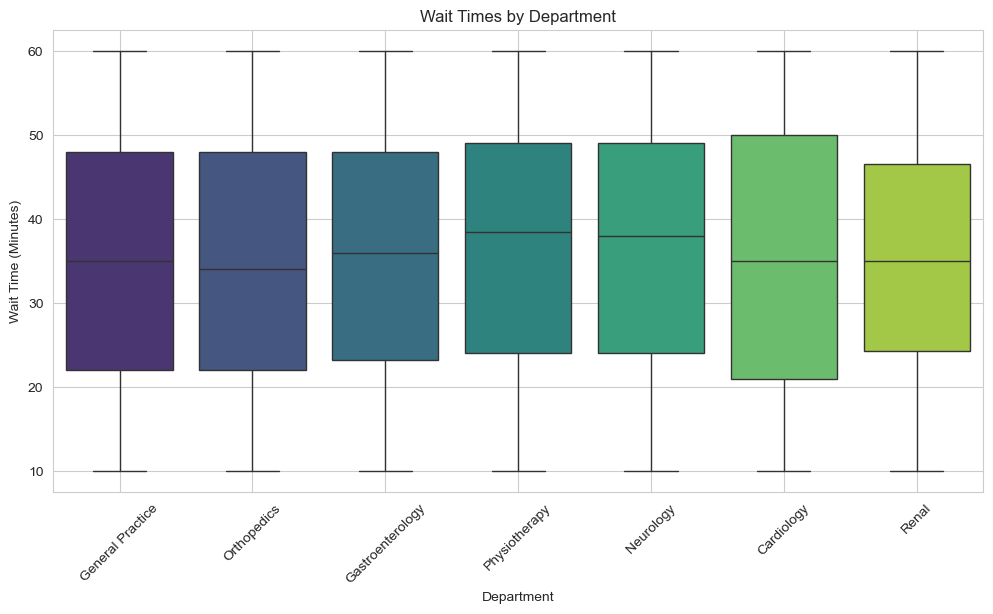

ANOVA Results: F-statistic = nan, p-value = nan
No significant difference in wait times across departments.


/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_stats_py.py:4102: DegenerateDataWarning: at least one input has length 0
  if _f_oneway_is_too_small(samples):


In [78]:
from scipy.stats import f_oneway

# Boxplot for wait times by department
plt.figure(figsize=(12, 6))
sns.boxplot(x="Department Referral", y="Patient Waittime", data=df_cleaned, palette="viridis")
plt.xticks(rotation=45)
plt.title("Wait Times by Department")
plt.xlabel("Department")
plt.ylabel("Wait Time (Minutes)")
plt.grid(True)
plt.show()

# Perform ANOVA test
wait_times_by_department = [df_cleaned[df_cleaned["Department Referral"] == dept]["Patient Waittime"] 
                            for dept in df_cleaned["Department Referral"].unique()]
f_stat, p_value = f_oneway(*wait_times_by_department)
print(f"ANOVA Results: F-statistic = {f_stat:.4f}, p-value = {p_value:.4f}")

if p_value < 0.05:
    print("Significant differences in wait times across departments.")
else:
    print("No significant difference in wait times across departments.")


## 🔮 9. Predictive Modeling (Predicting Patient Satisfaction)  


### ⚙️ a) Prepare Data for Regression  
- Since **Linear Regression** and **XGBoost Regression** are used for continuous predictions, we keep **Satisfaction Score** as a numeric variable.  
- Ensure data is cleaned and properly formatted for modeling.

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Select features
features = df_cleaned[["Patient Waittime", "Patient Age"]]
features = pd.get_dummies(features.join(df_cleaned["Department Referral"]), drop_first=True)

# Target variable (continuous score)
target = df_cleaned["Patient Satisfaction Score"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Standardize features for Linear Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


### 📈 b) Linear Regression Model  
- Train a **Linear Regression Model** to predict patient satisfaction based on key factors such as **wait time, department, and patient demographics**.  

Linear Regression MAE: 0.7325
Linear Regression MSE: 2.5254
Linear Regression R²: -0.0051


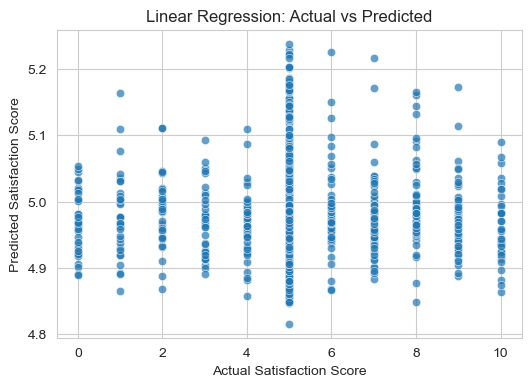

In [88]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Train Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

# Predictions
y_pred_lin = lin_reg.predict(X_test_scaled)

# Evaluation
mae_lin = mean_absolute_error(y_test, y_pred_lin)
mse_lin = mean_squared_error(y_test, y_pred_lin)
r2_lin = r2_score(y_test, y_pred_lin)

print(f"Linear Regression MAE: {mae_lin:.4f}")
print(f"Linear Regression MSE: {mse_lin:.4f}")
print(f"Linear Regression R²: {r2_lin:.4f}")

# Scatter Plot - Actual vs Predicted
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_test, y=y_pred_lin, alpha=0.7)
plt.xlabel("Actual Satisfaction Score")
plt.ylabel("Predicted Satisfaction Score")
plt.title("Linear Regression: Actual vs Predicted")
plt.grid(True)
plt.show()


### 🌲 c) Random Forest Regression Model  

Random Forest MAE: 1.1716
Random Forest MSE: 3.4062
Random Forest R²: -0.3556


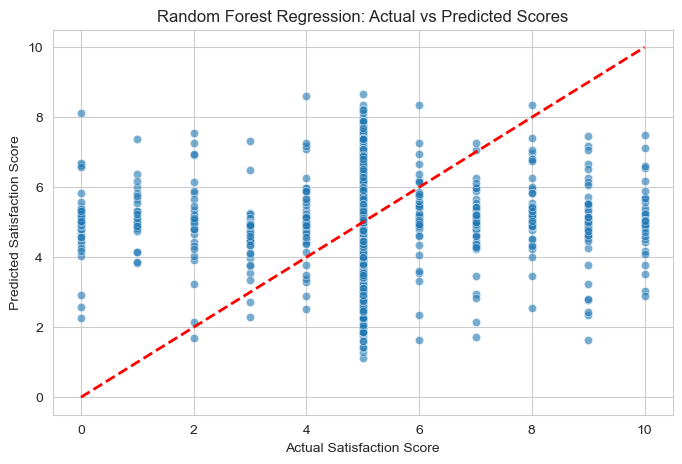

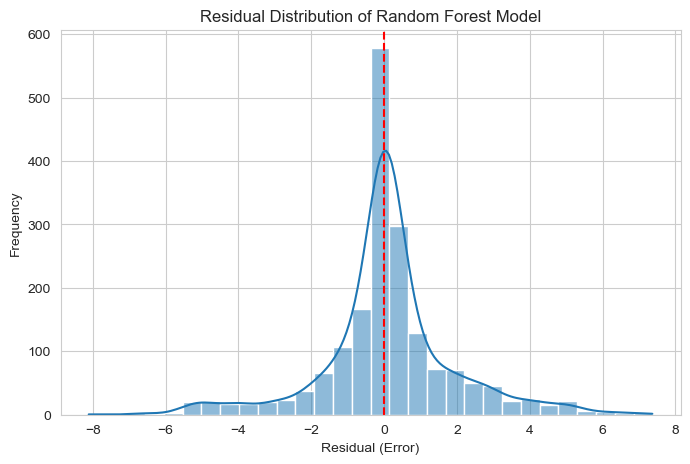

/var/folders/g4/y6v5qzbj28lb3__3vvn6prx40000gn/T/ipykernel_26454/3804277031.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=feature_names, palette="viridis")


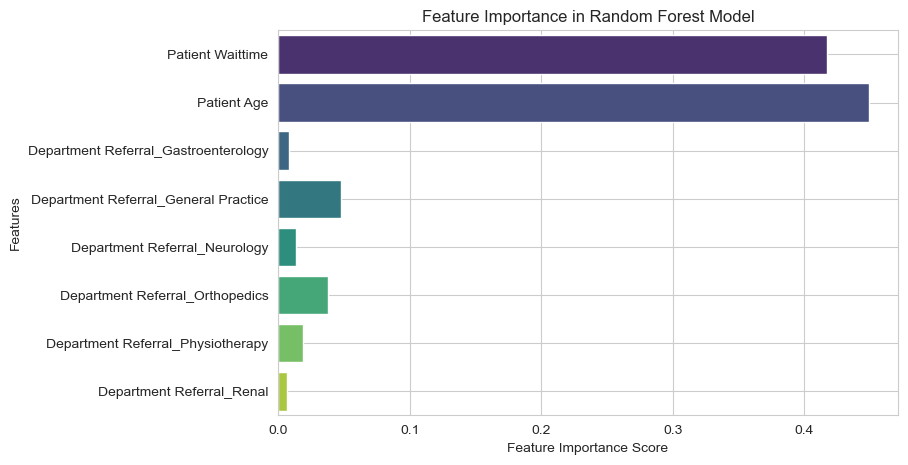

In [108]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.ensemble import RandomForestRegressor

# Train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluation
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest MAE: {mae_rf:.4f}")
print(f"Random Forest MSE: {mse_rf:.4f}")
print(f"Random Forest R²: {r2_rf:.4f}")

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 📌 1. Scatter Plot: Actual vs. Predicted Values
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred_rf, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)  # 45-degree line
plt.xlabel("Actual Satisfaction Score")
plt.ylabel("Predicted Satisfaction Score")
plt.title("Random Forest Regression: Actual vs Predicted Scores")
plt.grid(True)
plt.show()

# 📌 2. Residual Plot: Prediction Errors
residuals = y_test - y_pred_rf
plt.figure(figsize=(8, 5))
sns.histplot(residuals, bins=30, kde=True)
plt.xlabel("Residual (Error)")
plt.ylabel("Frequency")
plt.title("Residual Distribution of Random Forest Model")
plt.axvline(x=0, color='red', linestyle='dashed')  # Mark zero error line
plt.grid(True)
plt.show()

# 📌 3. Feature Importance
importances = rf_model.feature_importances_
feature_names = X_train.columns

plt.figure(figsize=(8, 5))
sns.barplot(x=importances, y=feature_names, palette="viridis")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance in Random Forest Model")
plt.grid(True)
plt.show()



#### 🔍 i. Interpretation  
- **Scatter Plot:**  
  - If points are **close to the red diagonal line**, predictions are accurate.  
  - **Large deviations** indicate the model struggles in some areas.  

- **Residual Plot:**  
  - If errors are **normally distributed around 0**, the model is well-calibrated.  
  - **Skewed residuals** suggest potential bias in the model.  

- **Feature Importance:**  
  - **Higher scores** = More impact on predictions.  
  - Helps identify which factors drive **patient satisfaction** the most.  

XGBoost MAE: 0.8678
XGBoost MSE: 2.6153
XGBoost R²: -0.0409


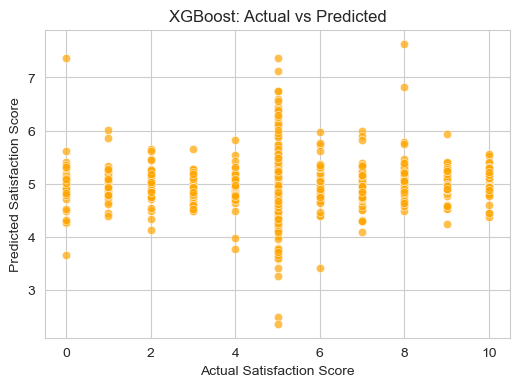

In [92]:
from xgboost import XGBRegressor

# Train XGBoost model
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluation
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost MAE: {mae_xgb:.4f}")
print(f"XGBoost MSE: {mse_xgb:.4f}")
print(f"XGBoost R²: {r2_xgb:.4f}")

# Scatter Plot - Actual vs Predicted
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_test, y=y_pred_xgb, alpha=0.7, color="orange")
plt.xlabel("Actual Satisfaction Score")
plt.ylabel("Predicted Satisfaction Score")
plt.title("XGBoost: Actual vs Predicted")
plt.grid(True)
plt.show()


### ⚖️ d) Model Performance Comparison  
- Compare the effectiveness of different models:  
  - ✅ **Linear Regression**  
  - 🌳 **Random Forest Regression**  
  - 🚀 **XGBoost Regression**  
- Use performance metrics such as **Mean Squared Error (MSE), R² Score, and Mean Absolute Error (MAE)** to determine the best model.  


               Model       MAE       MSE  R² Score
0  Linear Regression  0.732507  2.525407 -0.005087
2            XGBoost  0.867800  2.615303 -0.040865
1      Random Forest  1.171640  3.406212 -0.355639


/var/folders/g4/y6v5qzbj28lb3__3vvn6prx40000gn/T/ipykernel_26454/2322022692.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="R² Score", y="Model", data=comparison_df, palette="coolwarm")


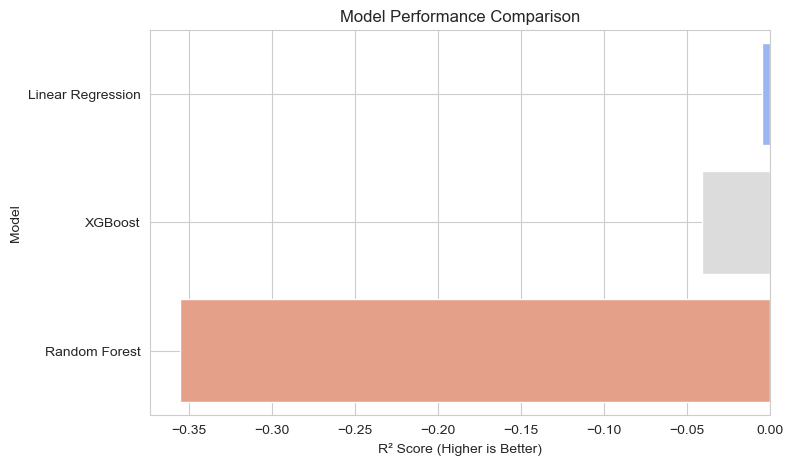

In [106]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create DataFrame for Model Comparison
comparison_df = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest", "XGBoost"],
    "MAE": [mae_lin, mae_rf, mae_xgb],
    "MSE": [mse_lin, mse_rf, mse_xgb],
    "R² Score": [r2_lin, r2_rf, r2_xgb]
})

# Sort by R² Score
comparison_df = comparison_df.sort_values(by="R² Score", ascending=False)
print(comparison_df)

# Bar Chart for Model Comparison
plt.figure(figsize=(8, 5))
sns.barplot(x="R² Score", y="Model", data=comparison_df, palette="coolwarm")
plt.xlabel("R² Score (Higher is Better)")
plt.ylabel("Model")
plt.title("Model Performance Comparison")
plt.grid(True)
plt.show()
